In [ ]:
###27_2_1

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('0.jpg', cv2.IMREAD_GRAYSCALE)
img_origin = img.copy()

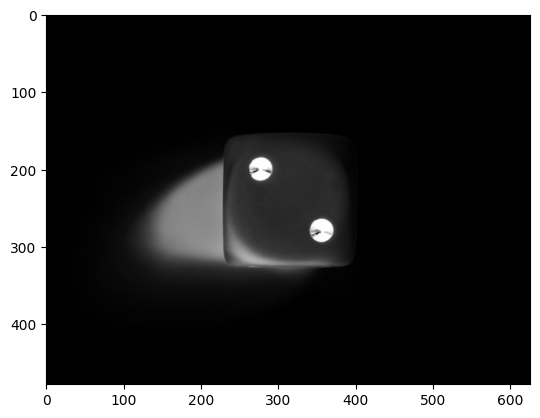

In [5]:
img = 255 - img
plt.imshow(img, cmap = "gray")
_, img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)

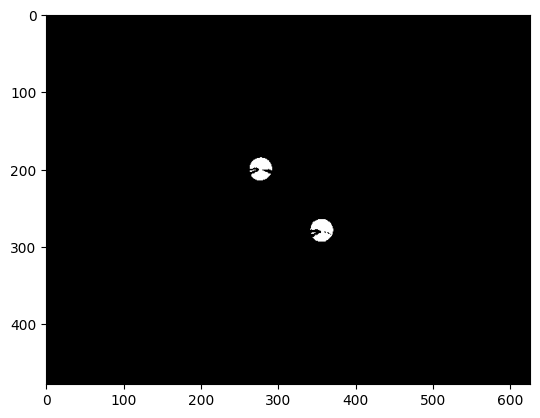

In [6]:
plt.imshow(img, cmap = "gray")

In [7]:
contoures, hierarchy = cv2.findContours( img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contoures))


7


In [8]:
i = 0 
for c in contoures : 
    if len(c) > 50 :
          i+=1
          x, y, w, h = cv2.boundingRect(c)
          cv2.rectangle(img_origin, (x,y) , (x+w , y+h) , (127,127,127) , 3 )

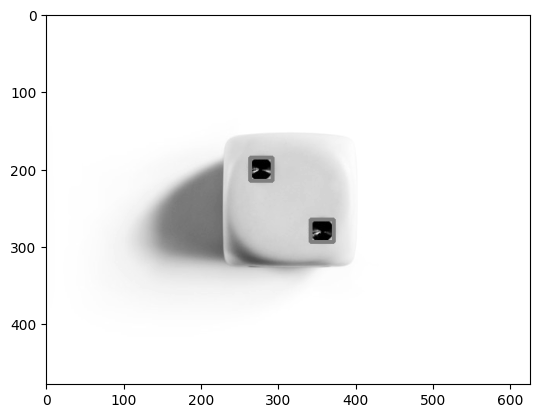

In [119]:
plt.imshow(img_origin, cmap = "gray")

In [120]:
print(i)

2


In [ ]:
###27_2_2


In [330]:
import numpy as np

In [331]:
import cv2

In [332]:
import matplotlib.pyplot as plt

In [333]:
img  = cv2.imread('3.jpg',cv2.IMREAD_GRAYSCALE)
img_origin = img.copy()

In [334]:
# plt.imshow(img, cmap = "gray")

In [335]:
img = 255 - img


In [385]:
_ , img  = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
img = cv2.medianBlur(img, 5)

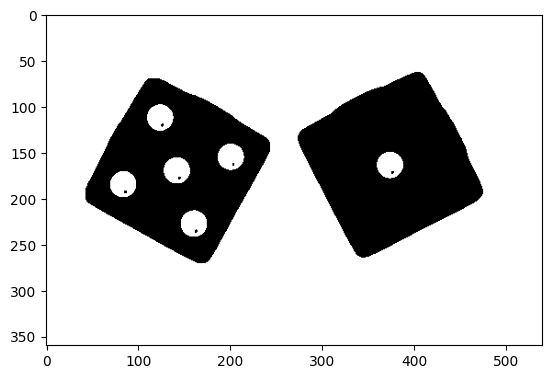

In [386]:
plt.imshow(img, cmap = "gray")

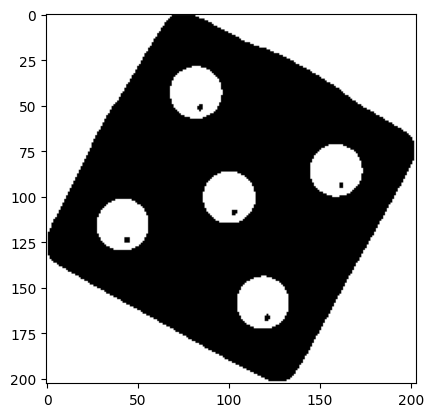

In [387]:
dices = []
contours, _ = cv2.findContours(img,  cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for c in contours:
    if len(c) > 250:
        x, y, w, h = cv2.boundingRect(c)
        dice = img[y:y+h , x:x+w]
        dices.append(dice)

plt.imshow(dices[0], cmap = "gray")

In [392]:
rows , cols = dices[0].shape
print(rows)

203


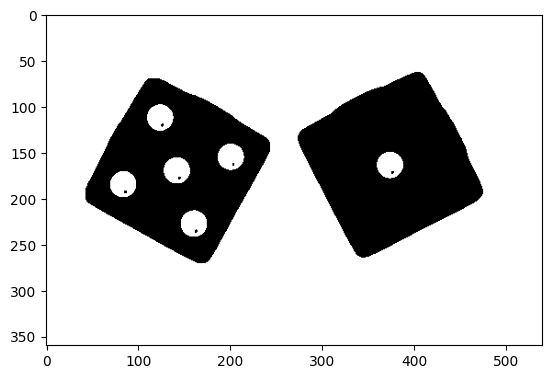

In [395]:
circles = cv2.HoughCircles(dices[0], cv2.HOUGH_GRADIENT, 1, rows/8,
                               param1=100, param2=30,
                               minRadius=1, maxRadius=30)
if circles is not None:
    print('yessss')
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(img, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img, center, radius, (255, 0, 255), 3)

plt.imshow(img, cmap = "gray")

    


In [390]:
# contours, hierarchy = cv2.findContours(dices[0],  cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# hierarchy = hierarchy[0]

# for component in zip(contours, hierarchy):
#     c = component[0]
#     hi = component[1]
#     if len(c) > 50:
#         x, y, w, h = cv2.boundingRect(c)
#         if hi[2] == -1:
#             cv2.rectangle(dices[0], (x,y) , (x+w,y+h), (127,127,127), 10) 

# plt.imshow(dices[0], cmap = "gray")


In [345]:
# plt.imshow(img_origin, cmap="gray")

In [96]:
#27_2_3

In [579]:
import cv2

In [580]:
import matplotlib.pyplot as plt

In [581]:
img  = cv2.imread('2.jpg',cv2.IMREAD_GRAYSCALE)
img_origin = img.copy()

In [582]:
img = 255 - img

In [583]:
_ , img  = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)

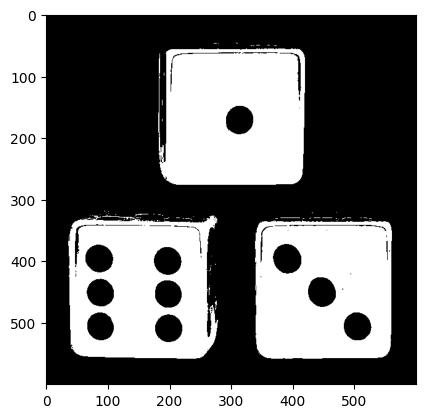

In [584]:
plt.imshow(img, cmap = "gray")

In [585]:
contours, hierarchy = cv2.findContours(img,  cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [586]:
i = 0
hierarchy = hierarchy[0] # get the actual inner list of hierarchy descriptions
for component in zip(contours, hierarchy):
    
    currentContour = component[0]
    currentHierarchy = component[1]
    # print(currentHierarchy)
    # print(currentHierarchy)
    # print(len(currentContour))
    if len(currentContour) > 120:
        x,y,w,h = cv2.boundingRect(currentContour)
        if currentHierarchy[2] < 0:
            cv2.rectangle(img_origin,(x,y),(x+w,y+h),(255,255,255),10)
            i+=1

print(i)

4


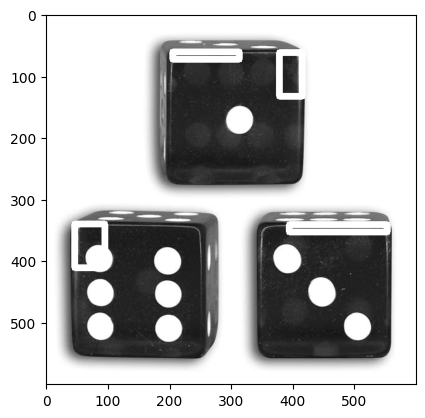

In [587]:
plt.imshow(img_origin, cmap="gray")